# Image Classification with HOG Feature and Neural Networks

In [1]:
import matplotlib.pyplot as plt
from skimage.feature import hog
from sklearn import datasets
from mlxtend.data import loadlocal_mnist
from sklearn.neural_network import MLPClassifier

In [2]:
pip install mlxtend

Note: you may need to restart the kernel to use updated packages.


## 1. Dataset Preparation

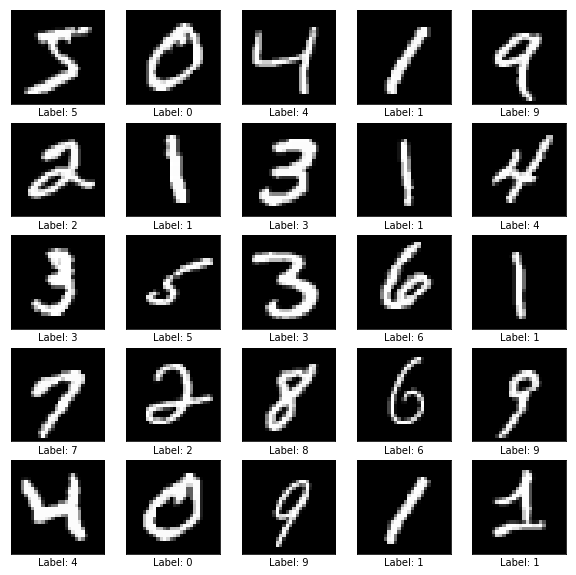

**Load image dataset**

In [6]:
train_images, train_labels = loadlocal_mnist(
    images_path='D:\\Machine Vision\\ATS_Muhammad Wahyu Nugraha_421220009\\emnist_source_files\\emnist-mnist-train-images-idx3-ubyte',
    labels_path='D:\\Machine Vision\\ATS_Muhammad Wahyu Nugraha_421220009\\emnist_source_files\\emnist-mnist-train-labels-idx1-ubyte'
)

In [7]:
test_images, test_labels = loadlocal_mnist( 
    images_path='D:\\Machine Vision\\ATS_Muhammad Wahyu Nugraha_421220009\\emnist_source_files\\emnist-mnist-test-images-idx3-ubyte',
    labels_path='D:\\Machine Vision\\ATS_Muhammad Wahyu Nugraha_421220009\\emnist_source_files\\emnist-mnist-test-labels-idx1-ubyte'
)

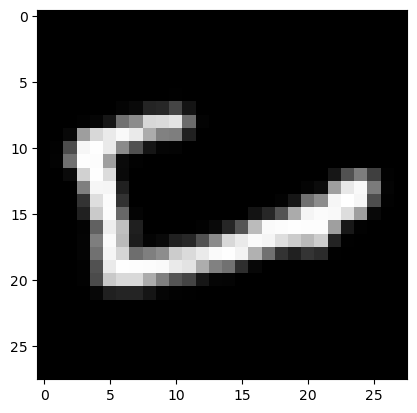

In [8]:
plt.imshow(train_images[5].reshape(28,28), cmap='gray')

In [9]:
train_labels[5]

7

**Test extract HOG feature from image**

In [11]:
feature, hog_img = hog(train_images[7].reshape(28,28), orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2,2), visualize=True, block_norm='L2')

In [12]:
feature.shape

(144,)

<BarContainer object of 144 artists>

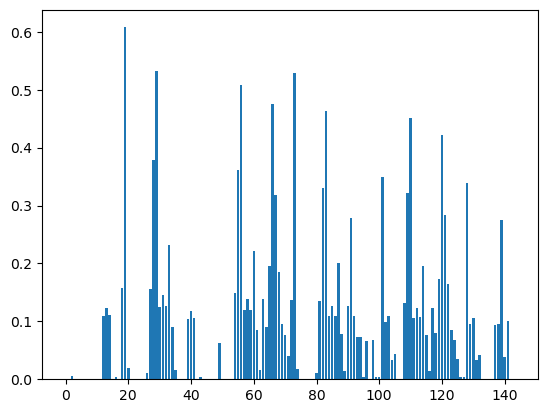

In [13]:
plt.bar(list(range(feature.shape[0])), feature)

In [14]:
feature, hog_img = hog(train_images[2].reshape(28,28), orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2,2), visualize=True, block_norm='L2')

<BarContainer object of 144 artists>

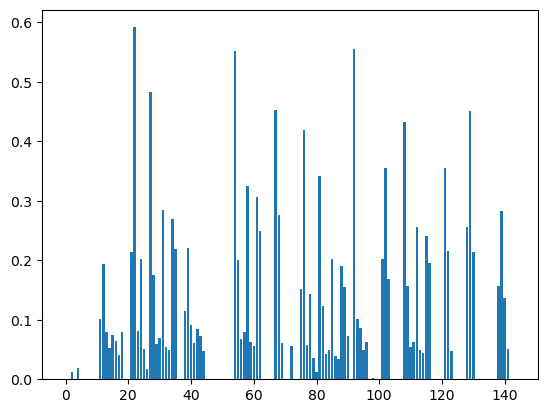

In [15]:
plt.bar(list(range(feature.shape[0])), feature)

## 2. Preprocessing using HOG Feature Extraction

In [17]:
n_dims = feature.shape[0]

In [18]:
n_dims

144

In [19]:
n_samples = train_images.shape[0]

In [20]:
n_samples

60000

**Create variable for dataset**

In [22]:
X_train, y_train = datasets.make_classification(n_samples=n_samples, n_features=n_dims)

In [23]:
X_train.shape

(60000, 144)

**Get HOG feature from each image & put into dataset variable**

In [25]:
for i in range(n_samples):
    X_train[i], _ = hog(train_images[i].reshape(28,28), orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2,2), visualize=True, block_norm='L2')
    y_train[i] = train_labels[i]

**Convert categorical label to one hot label**

In [27]:
from sklearn.preprocessing import LabelBinarizer

In [28]:
lb = LabelBinarizer()

In [29]:
lb.fit(y_train)

LabelBinarizer()

In [30]:
y_train_one_hot = lb.transform(y_train)

In [31]:
y_train_one_hot[5]

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0])

In [32]:
y_train[5]

7

In [33]:
import numpy as np

In [34]:
label = lb.inverse_transform(np.array([y_train_one_hot[0]]))

In [35]:
label[0]

4

## 3. Classification with Neural Networks

In [38]:
clf = MLPClassifier(hidden_layer_sizes=(256, 64, 10), solver='sgd', learning_rate_init=0.001, max_iter=500)

In [39]:
clf.fit(X_train, y_train_one_hot)

D:\Aplikasi PC\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(256, 64, 10), max_iter=500, solver='sgd')

## 4. Predict Test Dataset 

In [41]:
n_samples = test_images.shape[0]

In [42]:
X_test, y_test = datasets.make_classification(n_samples=n_samples, n_features=n_dims)

In [43]:
for i in range(n_samples):
    X_test[i], _ = hog(test_images[i].reshape(28,28), orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2,2), visualize=True, block_norm='L2')
    y_test[i] = test_labels[i]

In [44]:
y_test_one_hot = lb.transform(y_test)

In [45]:
y_pred_one_hot = clf.predict(X_test)

In [46]:
y_pred = lb.inverse_transform(y_pred_one_hot)

In [47]:
y_pred

array([1, 8, 6, ..., 8, 9, 6])

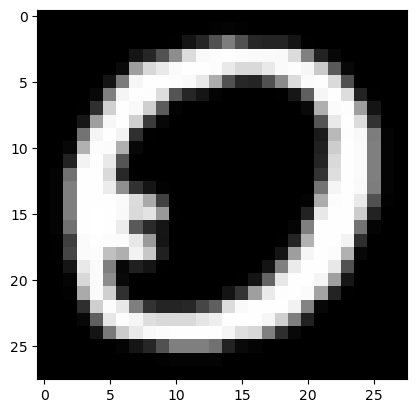

In [48]:
plt.imshow(test_images[20].reshape(28,28), cmap='gray')

In [49]:
out_one_hot = clf.predict(X_test[20].reshape(1, n_dims))

In [50]:
out_one_hot

array([[1, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [51]:
out = lb.inverse_transform(out_one_hot.reshape(1,10))

In [52]:
out[0]

0

## 5. Evaluation Metrics

### 5. 1 Confussion Matrix

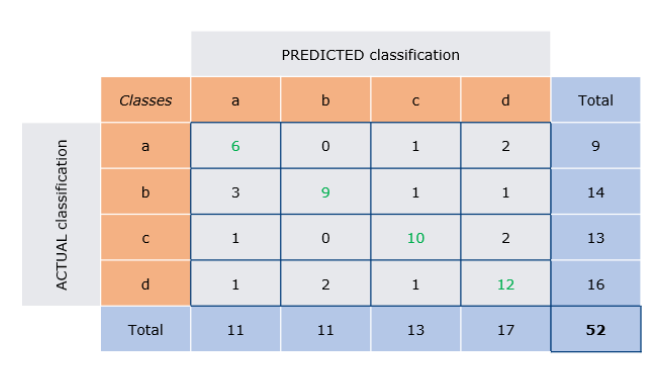

In [55]:
from sklearn.metrics import confusion_matrix

In [56]:
conf_mat = confusion_matrix(y_test, y_pred)

In [57]:
conf_mat

array([[993,   0,   1,   1,   2,   1,   1,   1,   0,   0],
       [  8, 986,   1,   0,   2,   0,   1,   1,   1,   0],
       [  7,   0, 980,   6,   1,   1,   0,   1,   4,   0],
       [ 11,   0,   9, 972,   0,   4,   0,   1,   2,   1],
       [  9,   1,   0,   0, 986,   1,   0,   0,   0,   3],
       [  7,   0,   0,   5,   0, 984,   1,   0,   2,   1],
       [  6,   0,   0,   0,   1,   2, 990,   0,   1,   0],
       [ 12,   1,   6,   0,   4,   0,   0, 974,   1,   2],
       [ 15,   4,   7,   3,   3,   8,   2,   1, 956,   1],
       [ 28,   0,   0,   3,   6,   2,   0,   5,   4, 952]], dtype=int64)

In [58]:
from mlxtend.plotting import plot_confusion_matrix

In [59]:
class_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

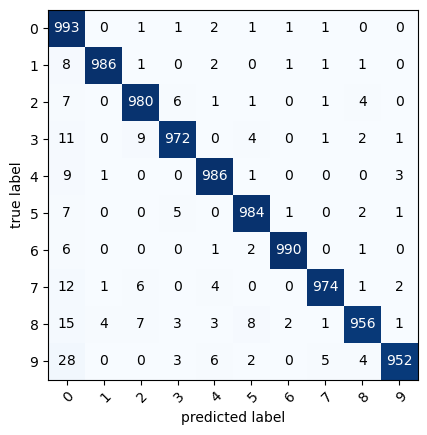

In [60]:
fig, ax = plot_confusion_matrix(conf_mat=conf_mat, class_names=class_names)

### 5.2 Precission

$$\text { Precision }=\frac{T P}{T P+F P}$$

In [63]:
from sklearn.metrics import precision_score

In [64]:
precision = precision_score(y_test, y_pred, average=None)

In [65]:
precision

array([0.9060219 , 0.99395161, 0.97609562, 0.98181818, 0.98109453,
       0.98105683, 0.99497487, 0.9898374 , 0.98455201, 0.99166667])

### 5.3 Recall

$$\text { Recall }=\frac{T P}{T P+F N}$$

In [68]:
from sklearn.metrics import recall_score

In [69]:
recall = recall_score(y_test, y_pred, average=None)

In [70]:
recall

array([0.993, 0.986, 0.98 , 0.972, 0.986, 0.984, 0.99 , 0.974, 0.956,
       0.952])

### 5.4 Accuracy

$$\text { Accuracy }=\frac{T P+T N}{T P+T N+F P+F N}$$

In [73]:
from sklearn.metrics import accuracy_score

In [74]:
accuracy = accuracy_score(y_test, y_pred)

In [75]:
accuracy

0.9773

### 5.5 F1-Score

$$\text { F1-Score }=\left(\frac{2}{\text { precision }^{-1}+\text { recall }^{-1}}\right)=2 \cdot\left(\frac{\text { precision } \cdot \text { recall }}{\text { precision }+\text { recall }}\right)$$

In [78]:
from sklearn.metrics import f1_score

In [79]:
f1 = f1_score(y_test, y_pred, average='macro')

In [80]:
f1

0.9774305184942336